In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, f1_score, fbeta_score, accuracy_score
from sklearn.utils import shuffle
import random 
import numpy as np

In [3]:
# Load UCI breast cancer dataset with column names and remove ID column
uci_bc_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
    sep=",",
    header=None,
    names=[
        "id_number", "diagnosis", "radius_mean",
        "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean",
        "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se",
        "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst",
        "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst",
        "symmetry_worst", "fractal_dimension_worst"
    ],).drop("id_number", axis=1)

y = uci_bc_data.diagnosis.map({"B": 0, "M": 1}).to_numpy()
X = uci_bc_data.drop("diagnosis", axis=1).to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

In [5]:
uci_bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
uci_bc_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

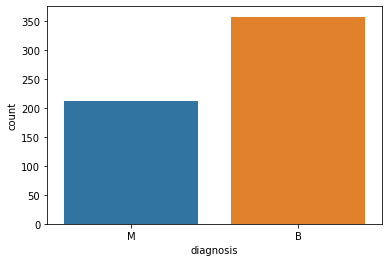

In [6]:
sns.countplot(x=uci_bc_data.diagnosis)

In [7]:
uci_bc_data.diagnosis.value_counts()/uci_bc_data.shape[0]

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

<AxesSubplot:>

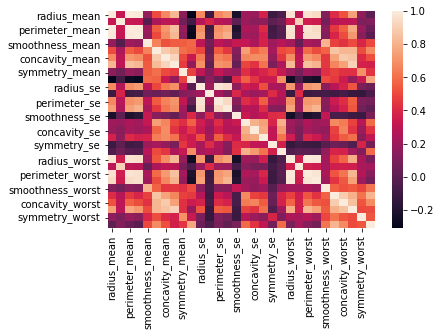

In [12]:
sns.heatmap(uci_bc_data.corr())

# Question 3

We prepare our data for linear models using standarization

In [9]:
sc = StandardScaler()
sc.fit(X_train)
X_scaled = sc.transform(X_train)

In [10]:
model = RandomForestClassifier()
skf = StratifiedKFold(n_splits=3)
kf = KFold(n_splits=3)
cv_results = cross_validate(model, 
                            X_scaled, 
                            y_train, 
                            cv=kf,
                            scoring=["accuracy","f1","roc_auc","recall","precision"])

cv_results1 = cross_validate(model, 
                            X_scaled, 
                            y_train, 
                            cv=skf,
                            scoring=["accuracy","f1","roc_auc","recall","precision"])

In [16]:
# non-stratified
round(np.mean(cv_results["test_recall"]),4)

0.9133

In [17]:
# stratified
round(np.mean(cv_results1["test_recall"]),4)

0.9229

We want a high recall cause the cost of under diagnosis is higher than the cost of over diagnosis

In [18]:
model = LogisticRegression()
skf = StratifiedKFold(n_splits=3)
kf = KFold(n_splits=3)
cv_results = cross_validate(model, 
                            X_scaled, 
                            y_train, 
                            cv=kf,
                            scoring=["accuracy","f1","roc_auc","recall","precision"])

cv_results1 = cross_validate(model, 
                            X_scaled, 
                            y_train, 
                            cv=skf,
                            scoring=["accuracy","f1","roc_auc","recall","precision"])

In [19]:
# non-stratified
round(np.mean(cv_results["test_recall"]),4)

0.9271

In [20]:
# stratified
round(np.mean(cv_results1["test_recall"]),4)

0.9348

In both cases the stratified version works betters as there is a better representation of the clases on the splits and the model gets to learn more. Also, the Logistic regression outperforms Random forest by one point of recall. Let's see how they do on the test set

In [25]:
lr = LogisticRegression(max_iter=10000)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [30]:
log_pred = lr.predict(X_test)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [29]:
forest_pred = rf.predict(X_test)
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Now the RF wins. This suggests the difference could be explained by randomness and more data should be used (or boostraping) if we want to know for sure what model is the "winner"

# Question 4

In [6]:
# generate imbalanced data
def expand_imbalance_data(X,
                          y,
                          imbalance):
    
    current_imbalance = np.mean(y)
    X_resp = X.copy()
    y_resp = y.copy()
    
    if round(current_imbalance,2)==round(imbalance,2):
        print('No changes needed, current imbalance matches desired imbalance')
        return X, y
    
    elif round(current_imbalance,2) > round(imbalance,2):
        iters = round((current_imbalance-imbalance)*X.shape[0]/(imbalance))
        for i in range(iters):
            sample = np.random.choice(np.where(y==0)[0],2)
            c1 = np.random.uniform()
            c2 = 1-c1
            X_new = X[sample[0],:]*c1 + X[sample[1],:]*c2
            X_resp = np.concatenate((X_resp,[X_new]))
            y_resp = np.concatenate((y_resp,[0]))
            
    elif round(current_imbalance,2) < round(imbalance,2):
        iters = round((imbalance-current_imbalance)*X.shape[0]/(1-imbalance))
        for i in range(iters):
            sample = np.random.choice(np.where(y==1)[0],2)
            c1 = np.random.uniform()
            c2 = 1-c1
            X_new = X[sample[0],:]*c1 + X[sample[1],:]*c2
            X_resp = np.concatenate((X_resp,[X_new]))
            y_resp = np.concatenate((y_resp,[1]))
    else:
        print('There is a problem')
        raise
    
    X_resp, y_resp = shuffle(X_resp, y_resp)
    
    return X_resp, y_resp

In [26]:
bootstrap_size = 500

no_correction_matrix = np.zeros((bootstrap_size,5))
up_sampling_matrix = np.zeros((bootstrap_size,5))
down_sampling_matrix = np.zeros((bootstrap_size,5))
class_weight_matrix = np.zeros((bootstrap_size,5))
synthetic_samples_matrix = np.zeros((bootstrap_size,5))

imbalances = [0.5, 0.4, 0.3, 0.2, 0.1]

for i in range(bootstrap_size):
    no_correction = []
    up_sampling = []
    down_sampling = []
    class_weight = []
    synthetic_samples = []

    for imbalance in imbalances:
        #print(imbalance)
        #print("imbalance \n")
        X_new, y_new = expand_imbalance_data(X,
                                             y,
                                             imbalance=imbalance)

        X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3)

        # no correction
        rf = RandomForestClassifier()
        rf.fit(X_train,y_train)
        #print(np.mean(y_train))
        #print(X_train.shape)
        #print('no correction \n')
        y_p = rf.predict(X_test)
        no_correction.append(recall_score(y_test, y_p))

        # oversampling
        rf = RandomForestClassifier()
        os = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = os.fit_resample(X_train, y_train)
        rf.fit(X_resampled,y_resampled)
        #print(np.mean(y_resampled))
        #print(X_resampled.shape)
        #print('oversampling \n')
        y_pos = rf.predict(X_test)
        up_sampling.append(recall_score(y_test, y_pos))

        # undersampling
        rf = RandomForestClassifier()
        us = ClusterCentroids(random_state=0)
        X_resampled, y_resampled = us.fit_resample(X_train, y_train)
        rf.fit(X_resampled,y_resampled)
        #print(np.mean(y_resampled))
        #print(X_resampled.shape)
        #print('undersampling \n')
        y_pus = rf.predict(X_test)
        down_sampling.append(recall_score(y_test, y_pus))


        # class_weight
        rf = RandomForestClassifier(class_weight="balanced_subsample")
        rf.fit(X_train,y_train)
        #print(np.mean(y_train))
        #print(X_train.shape)
        #print('class_weight \n')
        y_pcw = rf.predict(X_test)
        class_weight.append(recall_score(y_test, y_pcw))

        # synthetic_samples: mix between under and oversampling
        rf = RandomForestClassifier()
        smote_enn = SMOTEENN(random_state=0)
        X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
        rf.fit(X_resampled,y_resampled)
        #print(np.mean(y_resampled))
        #print(X_resampled.shape)
        #print('SMOTEEN \n')
        y_pss = rf.predict(X_test)
        synthetic_samples.append(recall_score(y_test, y_pss))
    
    no_correction_matrix[i,:] = no_correction
    up_sampling_matrix[i,:] = up_sampling
    down_sampling_matrix[i,:]= down_sampling
    class_weight_matrix[i,:]=class_weight
    synthetic_samples_matrix[i,:]=synthetic_samples

In [27]:
# prepare for visualization
df_noc = pd.DataFrame(no_correction_matrix)
df_resp_noc = None
for column in df_noc.columns:
    temp_df = pd.DataFrame({"recall":df_noc[column],"imbalance":imbalances[column]})
    df_resp_noc = pd.concat([df_resp_noc,temp_df])
    
df_ups = pd.DataFrame(up_sampling_matrix)
df_resp_ups = None
for column in df_ups.columns:
    temp_df = pd.DataFrame({"recall":df_ups[column],"imbalance":imbalances[column]})
    df_resp_ups = pd.concat([df_resp_ups,temp_df])
    
df_dos = pd.DataFrame(down_sampling_matrix)
df_resp_dos = None
for column in df_dos.columns:
    temp_df = pd.DataFrame({"recall":df_dos[column],"imbalance":imbalances[column]})
    df_resp_dos = pd.concat([df_resp_dos,temp_df])
    
df_cwm = pd.DataFrame(class_weight_matrix)
df_resp_cwm = None
for column in df_cwm.columns:
    temp_df = pd.DataFrame({"recall":df_cwm[column],"imbalance":imbalances[column]})
    df_resp_cwm = pd.concat([df_resp_cwm,temp_df])
    
df_ssm = pd.DataFrame(synthetic_samples_matrix)
df_resp_ssm = None
for column in df_ssm.columns:
    temp_df = pd.DataFrame({"recall":df_ssm[column],"imbalance":imbalances[column]})
    df_resp_ssm = pd.concat([df_resp_ssm,temp_df])

    

<AxesSubplot:xlabel='imbalance', ylabel='recall'>

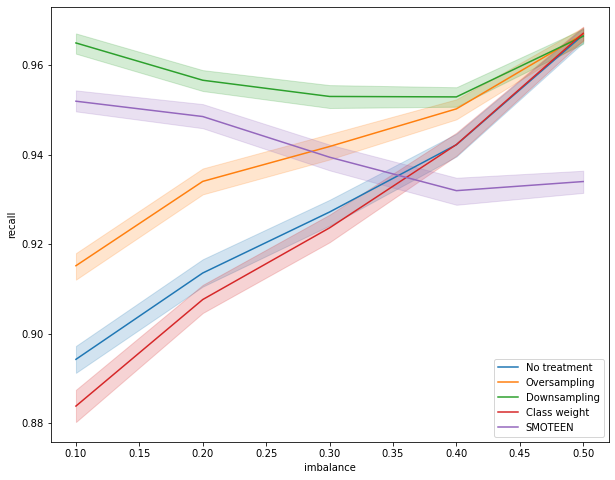

In [28]:
# plot 
plt.figure(figsize=(10,8))
sns.lineplot(y="recall",
             x="imbalance",
             data=df_resp_noc,
             sort=False,
             label="No treatment")

sns.lineplot(y="recall",
             x="imbalance",
             data=df_resp_ups,
             sort=False,
             label="Oversampling")

sns.lineplot(y="recall",
             x="imbalance",
             data=df_resp_dos,
             sort=False,
             label="Downsampling")

sns.lineplot(y="recall",
             x="imbalance",
             data=df_resp_cwm,
             label="Class weight")

sns.lineplot(y="recall",
             x="imbalance",
             data=df_resp_ssm,
             sort=False,
             label="SMOTEEN")

In [34]:
# f_beta

bootstrap_size = 500

no_correction_matrix = np.zeros((bootstrap_size,5))
up_sampling_matrix = np.zeros((bootstrap_size,5))
down_sampling_matrix = np.zeros((bootstrap_size,5))
class_weight_matrix = np.zeros((bootstrap_size,5))
synthetic_samples_matrix = np.zeros((bootstrap_size,5))

imbalances = [0.5, 0.4, 0.3, 0.2, 0.1]

for i in range(bootstrap_size):
    no_correction = []
    up_sampling = []
    down_sampling = []
    class_weight = []
    synthetic_samples = []

    for imbalance in imbalances:
        #print(imbalance)
        #print("imbalance \n")
        X_new, y_new = expand_imbalance_data(X,
                                             y,
                                             imbalance=imbalance)

        X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3)

        # no correction
        rf = RandomForestClassifier()
        rf.fit(X_train,y_train)
        #print(np.mean(y_train))
        #print(X_train.shape)
        #print('no correction \n')
        y_p = rf.predict(X_test)
        no_correction.append(fbeta_score(y_test, y_p,beta=1.5))

        # oversampling
        rf = RandomForestClassifier()
        os = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = os.fit_resample(X_train, y_train)
        rf.fit(X_resampled,y_resampled)
        #print(np.mean(y_resampled))
        #print(X_resampled.shape)
        #print('oversampling \n')
        y_pos = rf.predict(X_test)
        up_sampling.append(fbeta_score(y_test, y_pos,beta=1.5))

        # undersampling
        rf = RandomForestClassifier()
        us = ClusterCentroids(random_state=0)
        X_resampled, y_resampled = us.fit_resample(X_train, y_train)
        rf.fit(X_resampled,y_resampled)
        #print(np.mean(y_resampled))
        #print(X_resampled.shape)
        #print('undersampling \n')
        y_pus = rf.predict(X_test)
        down_sampling.append(fbeta_score(y_test, y_pus,beta=1.5))


        # class_weight
        rf = RandomForestClassifier(class_weight="balanced_subsample")
        rf.fit(X_train,y_train)
        #print(np.mean(y_train))
        #print(X_train.shape)
        #print('class_weight \n')
        y_pcw = rf.predict(X_test)
        class_weight.append(fbeta_score(y_test, y_pcw,beta=1.5))

        # synthetic_samples: mix between under and oversampling
        rf = RandomForestClassifier()
        smote_enn = SMOTEENN(random_state=0)
        X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
        rf.fit(X_resampled,y_resampled)
        #print(np.mean(y_resampled))
        #print(X_resampled.shape)
        #print('SMOTEEN \n')
        y_pss = rf.predict(X_test)
        synthetic_samples.append(fbeta_score(y_test, y_pss,beta=1.5))
    
    no_correction_matrix[i,:] = no_correction
    up_sampling_matrix[i,:] = up_sampling
    down_sampling_matrix[i,:]= down_sampling
    class_weight_matrix[i,:]=class_weight
    synthetic_samples_matrix[i,:]=synthetic_samples

C:\Users\alejo\Anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_generation\_cluster_centroids.py:190: ConvergenceWarning: Number of distinct clusters (248) found smaller than n_clusters (249). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


In [35]:
# prepare for visualization
df_noc = pd.DataFrame(no_correction_matrix)
df_resp_noc = None
for column in df_noc.columns:
    temp_df = pd.DataFrame({"f1.5":df_noc[column],"imbalance":imbalances[column]})
    df_resp_noc = pd.concat([df_resp_noc,temp_df])
    
df_ups = pd.DataFrame(up_sampling_matrix)
df_resp_ups = None
for column in df_ups.columns:
    temp_df = pd.DataFrame({"f1.5":df_ups[column],"imbalance":imbalances[column]})
    df_resp_ups = pd.concat([df_resp_ups,temp_df])
    
df_dos = pd.DataFrame(down_sampling_matrix)
df_resp_dos = None
for column in df_dos.columns:
    temp_df = pd.DataFrame({"f1.5":df_dos[column],"imbalance":imbalances[column]})
    df_resp_dos = pd.concat([df_resp_dos,temp_df])
    
df_cwm = pd.DataFrame(class_weight_matrix)
df_resp_cwm = None
for column in df_cwm.columns:
    temp_df = pd.DataFrame({"f1.5":df_cwm[column],"imbalance":imbalances[column]})
    df_resp_cwm = pd.concat([df_resp_cwm,temp_df])
    
df_ssm = pd.DataFrame(synthetic_samples_matrix)
df_resp_ssm = None
for column in df_ssm.columns:
    temp_df = pd.DataFrame({"f1.5":df_ssm[column],"imbalance":imbalances[column]})
    df_resp_ssm = pd.concat([df_resp_ssm,temp_df])

    

<AxesSubplot:xlabel='imbalance', ylabel='f1.5'>

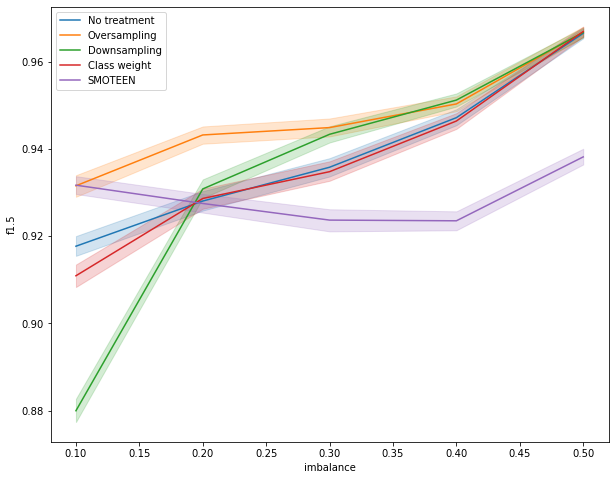

In [36]:
# plot 
plt.figure(figsize=(10,8))
sns.lineplot(y="f1.5",
             x="imbalance",
             data=df_resp_noc,
             sort=False,
             label="No treatment")

sns.lineplot(y="f1.5",
             x="imbalance",
             data=df_resp_ups,
             sort=False,
             label="Oversampling")

sns.lineplot(y="f1.5",
             x="imbalance",
             data=df_resp_dos,
             sort=False,
             label="Downsampling")

sns.lineplot(y="f1.5",
             x="imbalance",
             data=df_resp_cwm,
             label="Class weight")

sns.lineplot(y="f1.5",
             x="imbalance",
             data=df_resp_ssm,
             sort=False,
             label="SMOTEEN")

In [38]:
# accuracy

bootstrap_size = 500

no_correction_matrix = np.zeros((bootstrap_size,5))
up_sampling_matrix = np.zeros((bootstrap_size,5))
down_sampling_matrix = np.zeros((bootstrap_size,5))
class_weight_matrix = np.zeros((bootstrap_size,5))
synthetic_samples_matrix = np.zeros((bootstrap_size,5))

imbalances = [0.5, 0.4, 0.3, 0.2, 0.1]

for i in range(bootstrap_size):
    no_correction = []
    up_sampling = []
    down_sampling = []
    class_weight = []
    synthetic_samples = []

    for imbalance in imbalances:
        #print(imbalance)
        #print("imbalance \n")
        X_new, y_new = expand_imbalance_data(X,
                                             y,
                                             imbalance=imbalance)

        X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3)

        # no correction
        rf = RandomForestClassifier()
        rf.fit(X_train,y_train)
        #print(np.mean(y_train))
        #print(X_train.shape)
        #print('no correction \n')
        y_p = rf.predict(X_test)
        no_correction.append(accuracy_score(y_test, y_p))

        # oversampling
        rf = RandomForestClassifier()
        os = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = os.fit_resample(X_train, y_train)
        rf.fit(X_resampled,y_resampled)
        #print(np.mean(y_resampled))
        #print(X_resampled.shape)
        #print('oversampling \n')
        y_pos = rf.predict(X_test)
        up_sampling.append(accuracy_score(y_test, y_pos))

        # undersampling
        rf = RandomForestClassifier()
        us = ClusterCentroids(random_state=0)
        X_resampled, y_resampled = us.fit_resample(X_train, y_train)
        rf.fit(X_resampled,y_resampled)
        #print(np.mean(y_resampled))
        #print(X_resampled.shape)
        #print('undersampling \n')
        y_pus = rf.predict(X_test)
        down_sampling.append(accuracy_score(y_test, y_pus))


        # class_weight
        rf = RandomForestClassifier(class_weight="balanced_subsample")
        rf.fit(X_train,y_train)
        #print(np.mean(y_train))
        #print(X_train.shape)
        #print('class_weight \n')
        y_pcw = rf.predict(X_test)
        class_weight.append(accuracy_score(y_test, y_pcw))

        # synthetic_samples: mix between under and oversampling
        rf = RandomForestClassifier()
        smote_enn = SMOTEENN(random_state=0)
        X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
        rf.fit(X_resampled,y_resampled)
        #print(np.mean(y_resampled))
        #print(X_resampled.shape)
        #print('SMOTEEN \n')
        y_pss = rf.predict(X_test)
        synthetic_samples.append(accuracy_score(y_test, y_pss))
    
    no_correction_matrix[i,:] = no_correction
    up_sampling_matrix[i,:] = up_sampling
    down_sampling_matrix[i,:]= down_sampling
    class_weight_matrix[i,:]=class_weight
    synthetic_samples_matrix[i,:]=synthetic_samples

C:\Users\alejo\Anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_generation\_cluster_centroids.py:190: ConvergenceWarning: Number of distinct clusters (248) found smaller than n_clusters (249). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


In [39]:
# prepare for visualization
df_noc = pd.DataFrame(no_correction_matrix)
df_resp_noc = None
for column in df_noc.columns:
    temp_df = pd.DataFrame({"accuracy":df_noc[column],"imbalance":imbalances[column]})
    df_resp_noc = pd.concat([df_resp_noc,temp_df])
    
df_ups = pd.DataFrame(up_sampling_matrix)
df_resp_ups = None
for column in df_ups.columns:
    temp_df = pd.DataFrame({"accuracy":df_ups[column],"imbalance":imbalances[column]})
    df_resp_ups = pd.concat([df_resp_ups,temp_df])
    
df_dos = pd.DataFrame(down_sampling_matrix)
df_resp_dos = None
for column in df_dos.columns:
    temp_df = pd.DataFrame({"accuracy":df_dos[column],"imbalance":imbalances[column]})
    df_resp_dos = pd.concat([df_resp_dos,temp_df])
    
df_cwm = pd.DataFrame(class_weight_matrix)
df_resp_cwm = None
for column in df_cwm.columns:
    temp_df = pd.DataFrame({"accuracy":df_cwm[column],"imbalance":imbalances[column]})
    df_resp_cwm = pd.concat([df_resp_cwm,temp_df])
    
df_ssm = pd.DataFrame(synthetic_samples_matrix)
df_resp_ssm = None
for column in df_ssm.columns:
    temp_df = pd.DataFrame({"accuracy":df_ssm[column],"imbalance":imbalances[column]})
    df_resp_ssm = pd.concat([df_resp_ssm,temp_df])

    

<AxesSubplot:xlabel='imbalance', ylabel='accuracy'>

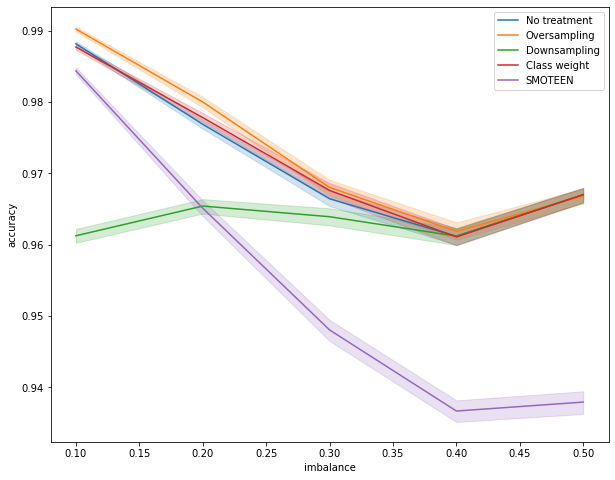

In [40]:
# plot 
plt.figure(figsize=(10,8))
sns.lineplot(y="accuracy",
             x="imbalance",
             data=df_resp_noc,
             sort=False,
             label="No treatment")

sns.lineplot(y="accuracy",
             x="imbalance",
             data=df_resp_ups,
             sort=False,
             label="Oversampling")

sns.lineplot(y="accuracy",
             x="imbalance",
             data=df_resp_dos,
             sort=False,
             label="Downsampling")

sns.lineplot(y="accuracy",
             x="imbalance",
             data=df_resp_cwm,
             label="Class weight")

sns.lineplot(y="accuracy",
             x="imbalance",
             data=df_resp_ssm,
             sort=False,
             label="SMOTEEN")